In [1]:
#importing all the models i will be using
import pandas as pd  #for data manipulation and analysis like creating and handling DataFrames
import seaborn as sns  #for creating visualizations like scatter plots and heatmaps
import matplotlib.pyplot as plt  #fro creating plots and visualizations like boxplots and scatter plots
import numpy as np  #for numerical computations like handling arrays and performing mathematical operations
from sklearn.linear_model import LinearRegression  #for building and training linear regression models
from sklearn.metrics import r2_score  #for evaluating the performance of regression models using R-squared
from sklearn.model_selection import train_test_split, KFold  #for splitting data into training and testing sets, and for cross-validation
from sklearn.metrics import mean_squared_error  #for evaluating regression models using RMSE (Root Mean Squared Error)


Pandas is a library used for working with data sets.It provides functions for data exploration, cleaning, analysis, and manipulation.(w3schools, 2025)

Seaborn is a library for making statistical graphics in Python. It strongly connects with pandas data structures and builds upon matplotlib.(Wasksom, 2024)

Matplotlib is a cross-platform library for Python and its numerical extension NumPy that provides graphical plotting and data visualization tools, such as bar charts, scatter plots, and histograms.(Activestate Software, 2025)

NumPy is for scientific computing.  A multidimensional array object, different derived objects (like masked arrays and matrices), and a variety of routines for quick array operations—including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation, and much more—are provided by thislibrary.(NumPy Developers, 2024)

the LinearRegression model from sklearn.linear_model minimizes the residual sum of squares between the targets predicted by the linear approximation and the observed targets in the dataset by fitting a linear model with coefficients w = (w1, …, wp).(scikit-learn, 2025)

To guarantee objective model evaluation in machine learning, you can effectively separate your dataset into training and testing subsets using scikit-learn's train_test_split() function.  By separating the test data from the training data, this procedure helps avoid overfitting and underfitting and enables you to precisely evaluate the model's predicted performance.(Stojiljković, 2025)

One of the most used metrics for assessing how well regression models work is Mean Squared Error (MSE).  It calculates the average squared difference between the expected and actual numbers, or the average of the squares of the errors(Geeksforgeeks, 2025). Using the mean_square-error input fron scikit-learn is going to simplify this process alot

In [3]:
#loading the dataset using pandas
data = pd.read_csv("student_lifestyle_dataset.csv")

Please store the dataset in the same directory as the notebook

In [5]:
#displaying the initial data shape in a tabular format
rows, columns = data.shape
print("Initial Data Shape:")
df = pd.DataFrame({'Rows': [rows], 'Columns': [columns]})
print(df)



Initial Data Shape:
   Rows  Columns
0  2000        8


In [6]:
#displaying the data types of each column using tabulate for better visuals and readability
from tabulate import tabulate

#assigning the datatypes of each column to a rows variable.
rows = data.dtypes.items()
print(tabulate(rows, headers=["Column","Dtype"], tablefmt="grid", colalign=("left","center")))


+---------------------------------+---------+
| Column                          |  Dtype  |
+=================================+=========+
| Student_ID                      |  int64  |
+---------------------------------+---------+
| Study_Hours_Per_Day             | float64 |
+---------------------------------+---------+
| Extracurricular_Hours_Per_Day   | float64 |
+---------------------------------+---------+
| Sleep_Hours_Per_Day             | float64 |
+---------------------------------+---------+
| Social_Hours_Per_Day            | float64 |
+---------------------------------+---------+
| Physical_Activity_Hours_Per_Day | float64 |
+---------------------------------+---------+
| GPA                             | float64 |
+---------------------------------+---------+
| Stress_Level                    | object  |
+---------------------------------+---------+


I used the tabulate import from tabulate to make the datatypes output look more presentable. The code used was sourced from geeksforgeeks, 2024. Introduction to Python Tabulate Library. [online] geeksforgeeks. Available at: <https://www.geeksforgeeks.org/introduction-to-python-tabulate-library/> [Accessed 24 April 2025].

In [8]:
data = data.drop(columns=['Student_ID', 'Stress_Level'])

#displaying the first few rows of the dataset
dhead = data.head()

# print a heading
print("\nData Head:\n")

print(tabulate(dhead, headers="keys", showindex=False, tablefmt="grid"))


Data Head:

+-----------------------+---------------------------------+-----------------------+------------------------+-----------------------------------+-------+
|   Study_Hours_Per_Day |   Extracurricular_Hours_Per_Day |   Sleep_Hours_Per_Day |   Social_Hours_Per_Day |   Physical_Activity_Hours_Per_Day |   GPA |
+=======================+=================================+=======================+========================+===================================+=======+
|                   6.9 |                             3.8 |                   8.7 |                    2.8 |                               1.8 |  2.99 |
+-----------------------+---------------------------------+-----------------------+------------------------+-----------------------------------+-------+
|                   5.3 |                             3.5 |                   8   |                    4.2 |                               3   |  2.75 |
+-----------------------+---------------------------------+----------

In [14]:

#checking for missing values in the data to see if there are any null values and summing them to see if there are any rows we need to drop
null_values = data.isnull().sum()
print(tabulate(null_values.reset_index(), headers=["Column", "Missing Values"], showindex=False, tablefmt="grid", colalign=("left", "center")))


+---------------------------------+------------------+
| Column                          |  Missing Values  |
+=================================+==================+
| Study_Hours_Per_Day             |        0         |
+---------------------------------+------------------+
| Extracurricular_Hours_Per_Day   |        0         |
+---------------------------------+------------------+
| Sleep_Hours_Per_Day             |        0         |
+---------------------------------+------------------+
| Social_Hours_Per_Day            |        0         |
+---------------------------------+------------------+
| Physical_Activity_Hours_Per_Day |        0         |
+---------------------------------+------------------+
| GPA                             |        0         |
+---------------------------------+------------------+


In [16]:
#checking for duplicates in the data
# Checking for duplicates in the data and displaying the result in a tabular format
dtDuplicates = data.duplicated()
print(tabulate(dtDuplicates.reset_index(), headers=["Index", "Is Duplicate"], showindex=False, tablefmt="grid", colalign=("left", "center")))


+---------+----------------+
| Index   |  Is Duplicate  |
+=========+================+
| 0       |     False      |
+---------+----------------+
| 1       |     False      |
+---------+----------------+
| 2       |     False      |
+---------+----------------+
| 3       |     False      |
+---------+----------------+
| 4       |     False      |
+---------+----------------+
| 5       |     False      |
+---------+----------------+
| 6       |     False      |
+---------+----------------+
| 7       |     False      |
+---------+----------------+
| 8       |     False      |
+---------+----------------+
| 9       |     False      |
+---------+----------------+
| 10      |     False      |
+---------+----------------+
| 11      |     False      |
+---------+----------------+
| 12      |     False      |
+---------+----------------+
| 13      |     False      |
+---------+----------------+
| 14      |     False      |
+---------+----------------+
| 15      |     False      |
+---------+---

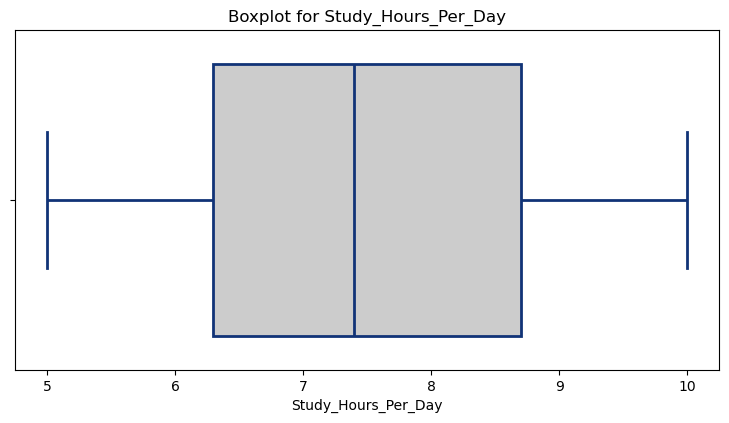

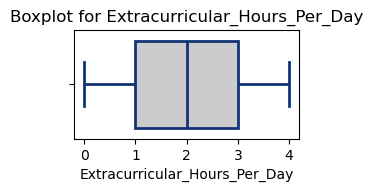

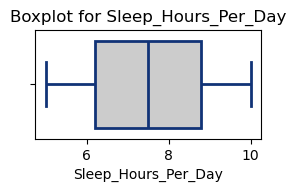

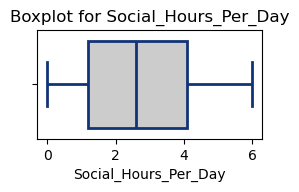

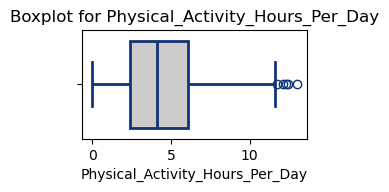

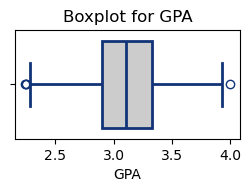

In [18]:

#Im going to run a for loop to create boxplots so I can see the dispersion of the students in each feature
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create boxplots for numerical columns
plt.figure(figsize=(20, 15))
m=1
for i in ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day','GPA']:
    plt.subplot(3, 2, m)
    sns.boxplot(x=data[i], color=".8", linecolor="#137", linewidth=2)
    plt.title(f"Boxplot for {i}")
    plt.show()


The code for the boxplots was inspired from the Machine Failure prediction dataset from the fisrt ice task. Jain, B., 2022. Machine Failure Prediction. [online] Kaggle. Available at: <https://www.kaggle.com/code/bhaveshjain1612/machine-failure-prediction/notebook> [Accessed 24 April 2025].

In [21]:
# Im noticing outliers in the GPA and physical activity hours per day so i will be capping the outliers using the IQR method, im capping outliers to reduce their impact on the regression model and improve its performance im not removing them completely as they may still contain valuable information about the data distribution and relationships between variables.
def cap_outliers(df, column):
    #calculating the first quartile (Q1) and third quartile (Q3) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75) 
    #calculate the interquartile range (IQR)
    IQR = Q3 - Q1  
    #defining the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #capping values below the lower bound to the lower bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    #capping values above the upper bound to the upper bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    #returning the modified data to the DataFrame
    return df

#cap the outliers for the 'Physical_Activity_Hours_Per_Day' column
data = cap_outliers(data, 'Physical_Activity_Hours_Per_Day')
# Cap the outliers for the 'GPA' column
data = cap_outliers(data, 'GPA')


Mehreen, K., 2024. How to Handle Outliers in Dataset with Pandas. [online] KDnuggest. Available at: <https://www.kdnuggets.com/how-to-handle-outliers-in-dataset-with-pandas> [Accessed 24 April 2025].

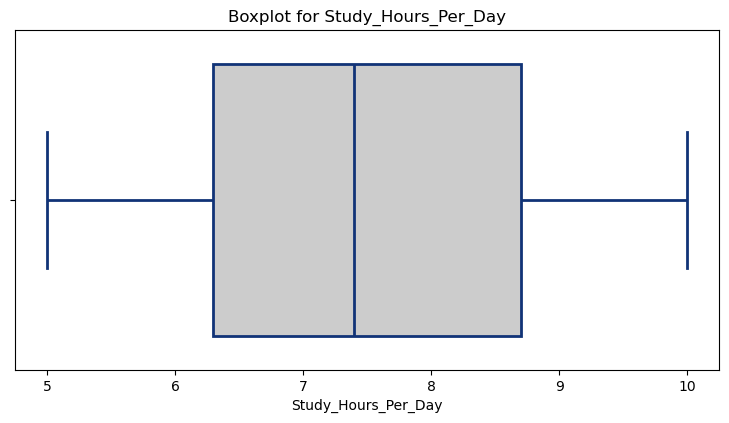

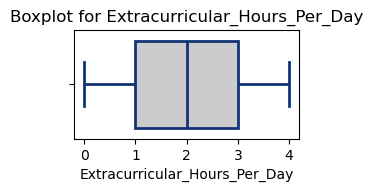

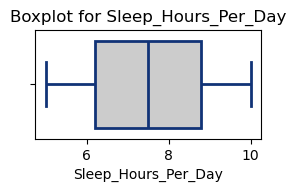

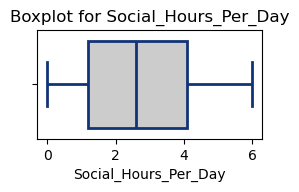

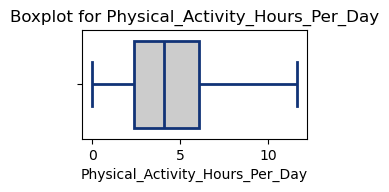

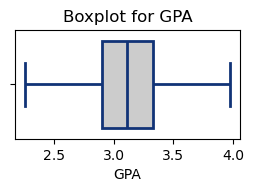

In [24]:

#creating boxplots again to see if the outliers have been capped successfully
# Create boxplots for numerical columns
plt.figure(figsize=(20, 15))
m=1
for i in ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day','GPA']:
    plt.subplot(3, 2, m)
    sns.boxplot(x=data[i], color=".8", linecolor="#137", linewidth=2)
    plt.title(f"Boxplot for {i}")
    plt.show()

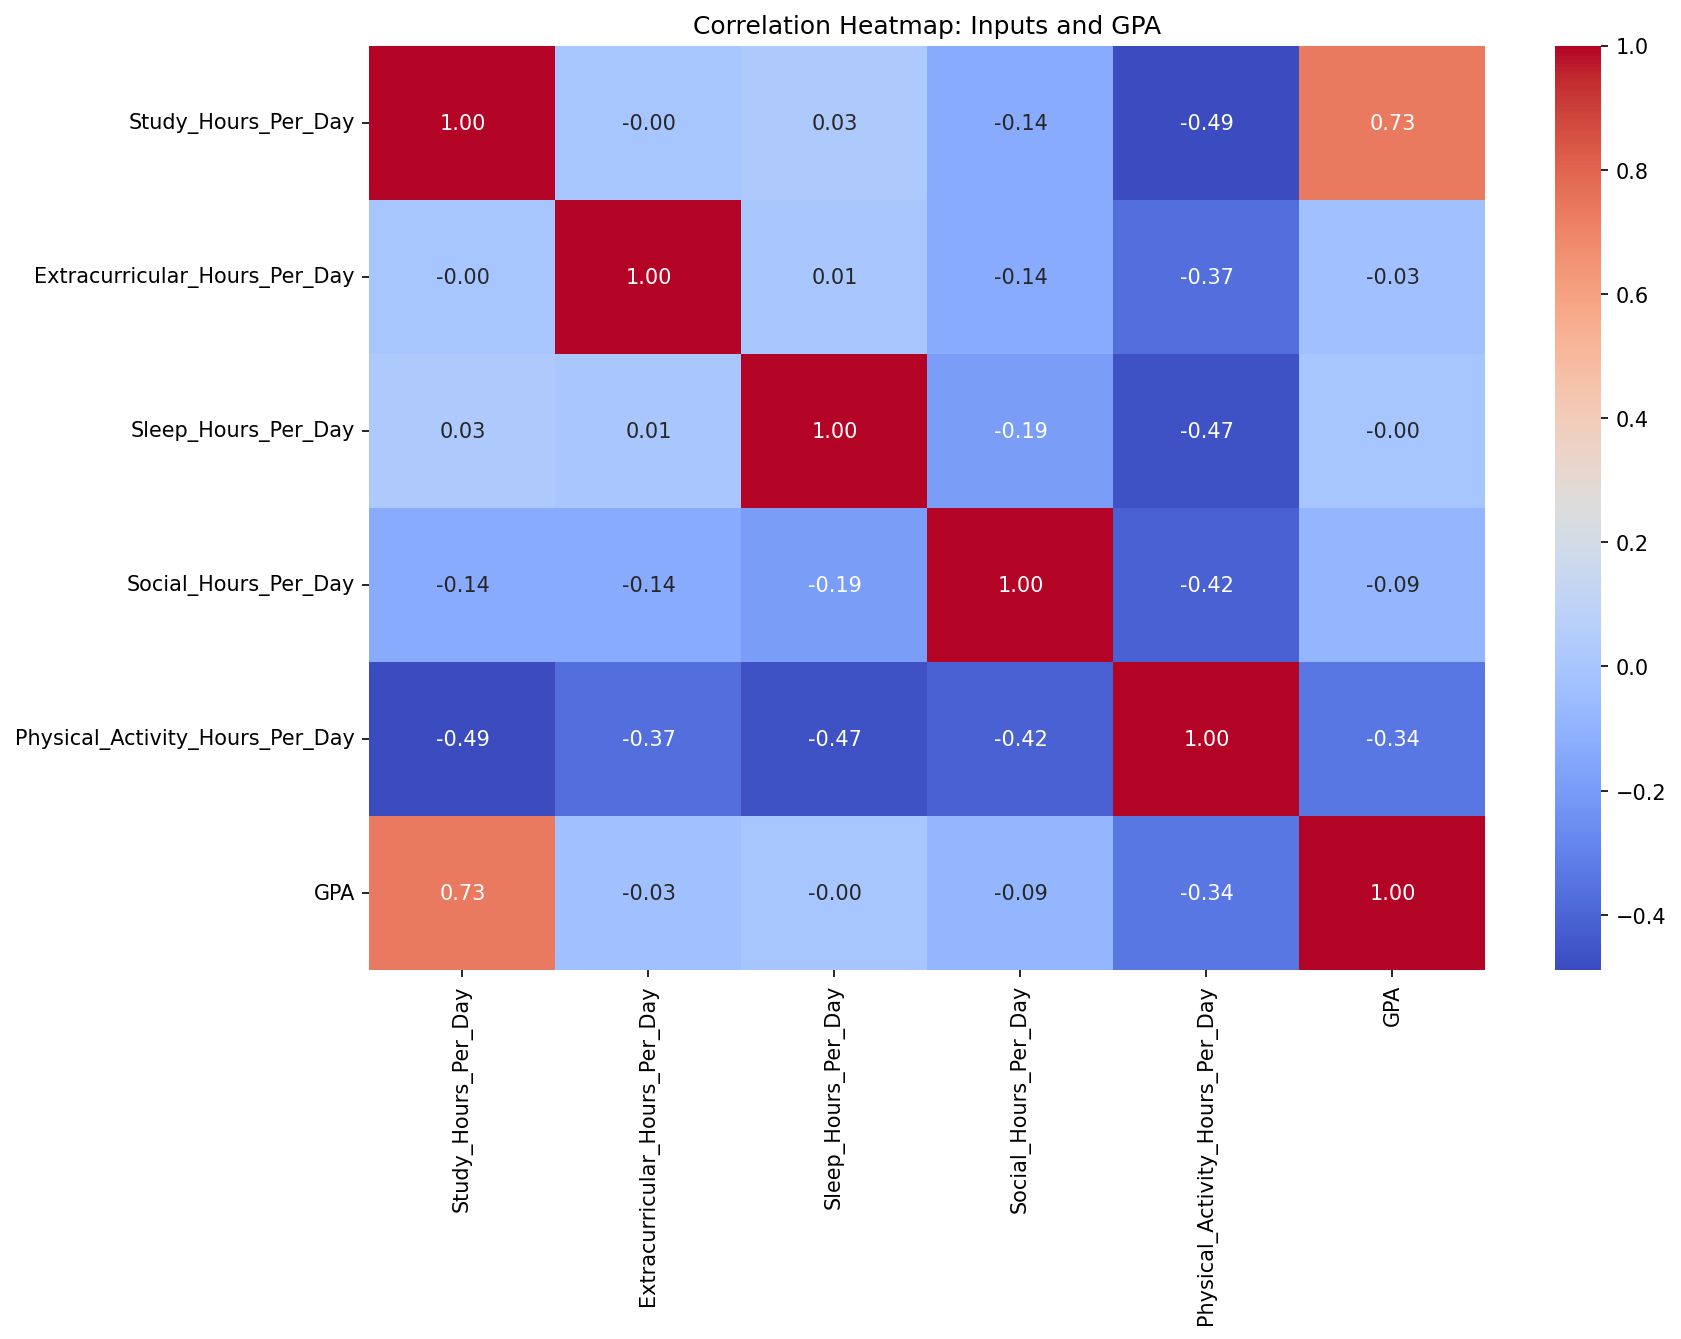

In [26]:
# I will now be plotting a heatmap so I can visualise the correlation my selected inputs have with GPA
X_numeric = data.select_dtypes(include=['number'])

#plotting the correlation matrix using seaborn to visualize the relationships between numerical features and GPA
plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap: Inputs and GPA")
plt.show()


The code used to map the heatmap was obtained from the Online Retail customer segmentation data set analysis on kaggle that was used for PDAN ICE Task X.(Kumar, 2022). Kumar, S., 2024. student lifestyle dataset. [online] kaggle. Available at: <https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset> [Accessed 17 April 2025]. 

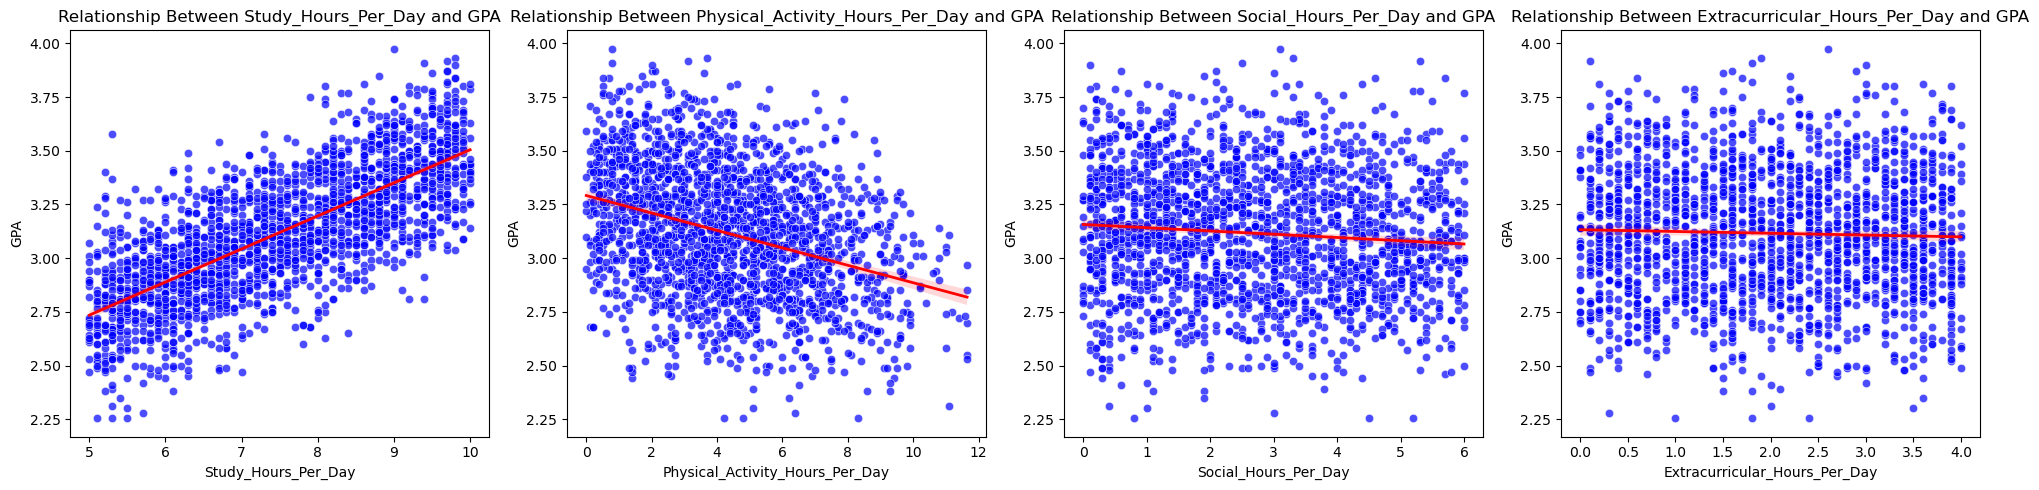

In [34]:
#now im plotting a scatter plot to further graphically represent the correlation between by chosen inputs and the GPA
#defining the inputs for scatter plots
inputs = ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Extracurricular_Hours_Per_Day']
output = 'GPA'

#creating scatter plots for each input variable against GPA
plt.figure(figsize=(20, 5))

#looping through each input to create individual scatter plots
for i, input in enumerate(inputs):
    plt.subplot(1, len(inputs), i + 1)  #creating a subplot for each input
    
    #scatter plot to visualize the relationship between the inputs and GPA
    sns.scatterplot(x=data[input], y=data[output], alpha=0.7, color='blue')
    
    #im add a regression line to the scatter plot to show the trend
    sns.regplot(x=data[input], y=data[output], scatter=False, color='red', line_kws={'linewidth': 2})
    
    plt.title(f"Relationship Between {input} and GPA")
    plt.xlabel(input)
    plt.ylabel("GPA")

#adjust the layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

In [37]:
#im going to be creating a linear regression model to predict GPA based on the selected inputs. i will be using the LinearRegression class from sklearn.linear_model to create the model and train it on the training data. i will also be splitting the data into training and testing sets using the train_test_split function from sklearn.model_selection.
#defining the inputs and outputs
X = data[['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Extracurricular_Hours_Per_Day']]
y = data['GPA']

In [39]:
#now im splitting the data based on the 80/20 rule of 80% training data and 20% test data and making sure they never mix this is to improve the model's performance and generalization to unseen data. im using the train_test_split function from sklearn.model_selection to split the data into training and testing sets. The data that is chosen for training and testing is chosen at random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#before creating the model i am implementing kfold cross-validation to evaluate the model's performance further. kFold splits the data into k folds and trains the model k times each time using a different fold as the test set and the remaining folds as the training set. I am doing this to again assess the model's performance and generalization to unseen data.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

In [43]:
r2_scores = [] #this list stores the R-squared values for each fold of cross-validation
rmse_scores = [] #this list stores the R-squared values for each fold of cross-validation

for train_index, val_index in kf.split(X_train):
    # here im splitting the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index] #subset of inputs for training and validation
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index] #subset of the stress output for training and validation
    
    #training the linear regression model on the training subset of the current fold
    model.fit(X_train_fold, y_train_fold)
    
    #predicting the target variable on the validation subset of once again the current fold
    y_val_pred = model.predict(X_val_fold)
    
    #now im calculating R-squared for the current fold the R-squared measures how well the model explains the variance in the target variable
    r2_scores.append(r2_score(y_val_fold, y_val_pred))

    #now im calculating RMSE for the current fold which measures on average how far off my model's predictions are
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))

#printing the cross-validation results which are the R-squared and RMSE scores for each fold to evaluate model performance. im display the cross-validation results in a tabular format for better readability
#im creating a DataFrame to display the cross-validation results this DataFrame organizes the R-squared and RMSE scores for each fold making it easier for us to interpret the model's performance then just printing it normally
results = pd.DataFrame({
    "Fold": range(1, len(r2_scores) + 1),  # Adding fold numbers for clarity
    "R-squared": r2_scores, 
    "RMSE": rmse_scores  
})

# im also adding average metrics to the DataFrame to provide a summary of the model's overall performance across all folds
results.loc["Average"] = ["-", sum(r2_scores) / len(r2_scores), sum(rmse_scores) / len(rmse_scores)]

#displaying the results
print("\nCross-Validation Results:")
print(results)


Cross-Validation Results:
        Fold  R-squared      RMSE
0          1   0.536186  0.203042
1          2   0.536428  0.207079
2          3   0.533621  0.192323
3          4   0.521641  0.205855
4          5   0.553258  0.201231
Average    -   0.536227  0.201906


Lee, S., 2025. Beginner’s Guide to Implementing K-Fold Cross-Validation in Data Science Projects. [online] numberanalytics. Available at: <https://www.numberanalytics.com/blog/beginners-guide-kfold-cross-validation> [Accessed 24 April 2025].

In [46]:
#now im training the model on the full training set
model.fit(X_train, y_train)

LinearRegression()

In [48]:
#moving from the training data I am now going to evaluate the model on the test set to assess its performance on unseen data. this is important to ensure that the model generalizes well and is not overfitting to the training data.

#predicting the target variable on the test set
y_test_pred = model.predict(X_test)

#calculating R-squared and RMSE for the test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print test set results
print("\nTest Set R-squared:", r2_test)
print("Test Set RMSE:", rmse_test)


Test Set R-squared: 0.5496831395600286
Test Set RMSE: 0.20494918756721714


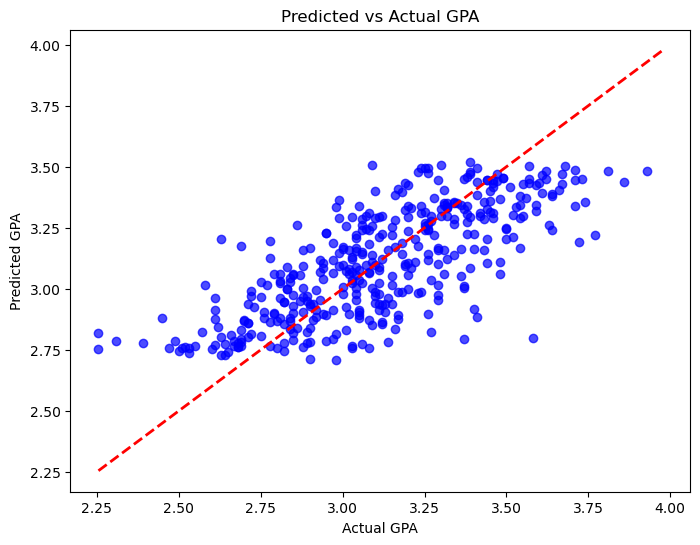

In [50]:
#now im going to be drawing a scatter plot to visualize the relationship between the predicted and actual stress levels in the test set. this plot helps us see how well the model's predictions align with the actual values. im also adding a diagonal line to represent perfect predictions where predicted values equal actual values.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual GPA")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.show()

Cao Thai, K.L., 2025. How to Predict Marks With a Simple Linear Regression. [online] Medium. Available at: <https://medium.com/@Eyquem/how-to-predict-marks-with-a-simple-linear-regression-ec323492e152> [Accessed 24 April 2025].

In [81]:
#let us make some dummy inputs for the sake of seeing the model in action i will manually input a figure for each of the inputs
dummy_inputs = {
    'Study_Hours_Per_Day': [5.0],  
    'Physical_Activity_Hours_Per_Day': [3.0],  
    'Social_Hours_Per_Day': [3.0], 
    'Extracurricular_Hours_Per_Day': [1.5]  
}

# Converting the dummy inputs into a data fram
input_df = pd.DataFrame(dummy_inputs)

#using the trained model to make a prediction
predicted_gpa = model.predict(input_df)

#printing out results
print("Predicted GPA:", predicted_gpa[0])

Predicted GPA: 2.725860836502949
